# Training and testing the model

In [ ]:
# Import basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read data file
data=pd.read_excel('Employee_analysis_transformed_data.xls')
data.head()

,Unnamed: 0,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EmpDepartment_Data Science,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Human Resources,EmpDepartment_Research & Development,EmpDepartment_Sales,EmpJobRole_Business Analyst,EmpJobRole_Data Scientist,EmpJobRole_Delivery Manager,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Healthcare Representative,EmpJobRole_Human Resources,EmpJobRole_Laboratory Technician,EmpJobRole_Manager,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes,PerformanceRating
0,0,0.333333,0.321429,0.50,1.000000,0.357143,0.666667,0.25,1.0,0.111111,0.071429,1.000000,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,3
1,1,0.690476,0.464286,0.75,1.000000,0.171429,0.666667,0.25,0.0,0.222222,0.071429,1.000000,0.500,0.333333,0.666667,0.175,0.388889,0.066667,0.411765,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,3
2,2,0.523810,0.142857,0.75,1.000000,0.257143,0.333333,0.50,0.0,0.555556,0.714286,0.666667,0.500,0.333333,0.666667,0.450,0.722222,0.066667,0.705882,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,4
3,3,0.547619,0.321429,0.75,0.333333,0.614286,0.333333,1.00,1.0,0.333333,0.285714,0.333333,0.575,0.333333,0.333333,0.525,0.333333,0.800000,0.352941,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,3
4,4,1.000000,0.535714,0.75,0.000000,0.771429,0.666667,0.25,0.0,0.888889,0.214286,1.000000,0.250,0.166667,0.666667,0.050,0.111111,0.133333,0.117647,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,3


In [ ]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EmpDepartment_Data Science,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Human Resources,EmpDepartment_Research & Development,EmpDepartment_Sales,EmpJobRole_Business Analyst,EmpJobRole_Data Scientist,EmpJobRole_Delivery Manager,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Healthcare Representative,EmpJobRole_Human Resources,EmpJobRole_Laboratory Technician,EmpJobRole_Manager,EmpJobRole_Manager R&D,EmpJobRole_Manufacturing Director,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes,PerformanceRating
0,0.333333,0.321429,0.50,1.000000,0.357143,0.666667,0.25,1.0,0.111111,0.071429,1.000000,0.250,0.333333,0.333333,0.250,0.388889,0.000000,0.470588,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,3
1,0.690476,0.464286,0.75,1.000000,0.171429,0.666667,0.25,0.0,0.222222,0.071429,1.000000,0.500,0.333333,0.666667,0.175,0.388889,0.066667,0.411765,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,3
2,0.523810,0.142857,0.75,1.000000,0.257143,0.333333,0.50,0.0,0.555556,0.714286,0.666667,0.500,0.333333,0.666667,0.450,0.722222,0.066667,0.705882,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,4
3,0.547619,0.321429,0.75,0.333333,0.614286,0.333333,1.00,1.0,0.333333,0.285714,0.333333,0.575,0.333333,0.333333,0.525,0.333333,0.800000,0.352941,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,3
4,1.000000,0.535714,0.75,0.000000,0.771429,0.666667,0.25,0.0,0.888889,0.214286,1.000000,0.250,0.166667,0.666667,0.050,0.111111,0.133333,0.117647,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,3


In [ ]:
# split data into X and Y
X=data.drop('PerformanceRating',axis=1)
Y=data[['PerformanceRating']]

In [ ]:
# Split data for training and testing
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=5)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((804, 61), (396, 61), (396, 1), (804, 1))

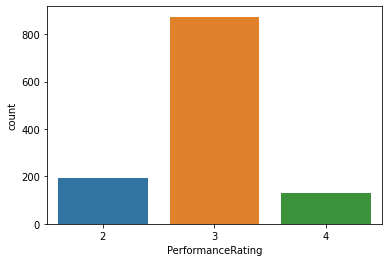

In [ ]:
# check whether data is balanced or not
sns.countplot(data['PerformanceRating'])

# Since data is imbalanced we smote to balance data.

In [ ]:
from imblearn.over_sampling import SMOTE
over_smote = SMOTE()
X_train,Y_train = over_smote.fit_sample(x_train,y_train)

In [ ]:
print(x_train.shape)
print(X_train.shape)

(804, 61)
(1737, 61)


In [ ]:
print(y_train.shape)
print(Y_train.shape)

(804, 1)
(1737,)


In [ ]:
Y_train=pd.DataFrame(Y_train, columns = y_train.columns)
X_train=pd.DataFrame(X_train, columns = x_train.columns)

In [ ]:
print(y_train.value_counts())
print(Y_train.value_counts())

PerformanceRating
3                    579
2                    131
4                     94
dtype: int64
PerformanceRating
4                    579
3                    579
2                    579
dtype: int64


# Selecting classification Models

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)
log_predict = model_log.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=log_predict))
print(classification_report(y_test,log_predict))
confusion_matrix(y_test,log_predict)


accuracy score :
 0.7702020202020202
              precision    recall  f1-score   support

           2       0.54      0.81      0.65        63
           3       0.93      0.76      0.84       295
           4       0.48      0.79      0.60        38

    accuracy                           0.77       396
   macro avg       0.65      0.79      0.70       396
weighted avg       0.83      0.77      0.78       396



array([[ 51,   9,   3],
       [ 42, 224,  29],
       [  1,   7,  30]])

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(X_train,Y_train)
gb_predict=model_gb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print(classification_report(y_test,gb_predict))
confusion_matrix(y_test,gb_predict)

accuracy score :
 0.9318181818181818
              precision    recall  f1-score   support

           2       0.83      0.86      0.84        63
           3       0.96      0.96      0.96       295
           4       0.92      0.87      0.89        38

    accuracy                           0.93       396
   macro avg       0.90      0.89      0.90       396
weighted avg       0.93      0.93      0.93       396



array([[ 54,   9,   0],
       [ 10, 282,   3],
       [  1,   4,  33]])

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
model_ab=AdaBoostClassifier()
model_ab.fit(X_train,Y_train)
ab_predict=model_ab.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=ab_predict))
print(classification_report(y_test,ab_predict))
confusion_matrix(y_test,ab_predict)

accuracy score :
 0.7222222222222222
              precision    recall  f1-score   support

           2       0.75      0.86      0.80        63
           3       0.91      0.69      0.79       295
           4       0.27      0.71      0.39        38

    accuracy                           0.72       396
   macro avg       0.64      0.75      0.66       396
weighted avg       0.82      0.72      0.75       396



array([[ 54,   9,   0],
       [ 18, 205,  72],
       [  0,  11,  27]])

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)
xgb_predict=model_xgb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,xgb_predict)

accuracy score :
 0.9267676767676768
              precision    recall  f1-score   support

           2       0.84      0.86      0.85        63
           3       0.95      0.96      0.95       295
           4       0.89      0.82      0.85        38

    accuracy                           0.93       396
   macro avg       0.89      0.88      0.88       396
weighted avg       0.93      0.93      0.93       396



array([[ 54,   9,   0],
       [  9, 282,   4],
       [  1,   6,  31]])

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(X_train,Y_train)
lgb_predict=model_lgb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))
confusion_matrix(y_test,lgb_predict)

accuracy score :
 0.9242424242424242
              precision    recall  f1-score   support

           2       0.86      0.86      0.86        63
           3       0.95      0.95      0.95       295
           4       0.84      0.82      0.83        38

    accuracy                           0.92       396
   macro avg       0.88      0.88      0.88       396
weighted avg       0.92      0.92      0.92       396



array([[ 54,   9,   0],
       [  8, 281,   6],
       [  1,   6,  31]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(X_train,Y_train)
RF_predict=model_RF.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))
confusion_matrix(y_test,RF_predict)

accuracy score :
 0.9166666666666666
              precision    recall  f1-score   support

           2       0.89      0.86      0.87        63
           3       0.93      0.96      0.95       295
           4       0.83      0.66      0.74        38

    accuracy                           0.92       396
   macro avg       0.88      0.83      0.85       396
weighted avg       0.91      0.92      0.91       396



array([[ 54,   9,   0],
       [  6, 284,   5],
       [  1,  12,  25]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(X_train,Y_train)
DT_predict=model_DT.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print(classification_report(y_test,DT_predict))
confusion_matrix(y_test,DT_predict)


accuracy score :
 0.8661616161616161
              precision    recall  f1-score   support

           2       0.74      0.67      0.70        63
           3       0.92      0.92      0.92       295
           4       0.70      0.82      0.76        38

    accuracy                           0.87       396
   macro avg       0.79      0.80      0.79       396
weighted avg       0.87      0.87      0.87       396



array([[ 42,  19,   2],
       [ 14, 270,  11],
       [  1,   6,  31]])

In [ ]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, Y_train)
svm_predict=model_svm.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))
print(classification_report(y_test,svm_predict))
confusion_matrix(y_test,svm_predict)

accuracy score :
 0.76010101010101
              precision    recall  f1-score   support

           2       0.52      0.60      0.56        63
           3       0.86      0.83      0.84       295
           4       0.47      0.50      0.49        38

    accuracy                           0.76       396
   macro avg       0.62      0.64      0.63       396
weighted avg       0.77      0.76      0.76       396



array([[ 38,  22,   3],
       [ 33, 244,  18],
       [  2,  17,  19]])

# Hyperparameter tuning

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=180, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0.1, random_state=40)
model_xgb.fit(X_train,Y_train)
xgb_predict=model_xgb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,xgb_predict)

accuracy score :
 0.9419191919191919
              precision    recall  f1-score   support

           2       0.89      0.86      0.87        63
           3       0.95      0.97      0.96       295
           4       0.94      0.87      0.90        38

    accuracy                           0.94       396
   macro avg       0.93      0.90      0.91       396
weighted avg       0.94      0.94      0.94       396



array([[ 54,   9,   0],
       [  7, 286,   2],
       [  0,   5,  33]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=15, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,random_state=40)
model_RF.fit(X_train,Y_train)
RF_predict=model_RF.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))
confusion_matrix(y_test,RF_predict)

accuracy score :
 0.9318181818181818
              precision    recall  f1-score   support

           2       0.89      0.87      0.88        63
           3       0.94      0.97      0.96       295
           4       0.90      0.74      0.81        38

    accuracy                           0.93       396
   macro avg       0.91      0.86      0.88       396
weighted avg       0.93      0.93      0.93       396



array([[ 55,   8,   0],
       [  6, 286,   3],
       [  1,   9,  28]])

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=3, learning_rate=0.1, n_estimators=200, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=20)
model_lgb.fit(X_train,Y_train)
lgb_predict=model_lgb.predict(x_test)
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))
confusion_matrix(y_test,lgb_predict)

accuracy score :
 0.9368686868686869
              precision    recall  f1-score   support

           2       0.87      0.86      0.86        63
           3       0.95      0.97      0.96       295
           4       0.94      0.82      0.87        38

    accuracy                           0.94       396
   macro avg       0.92      0.88      0.90       396
weighted avg       0.94      0.94      0.94       396



array([[ 54,   9,   0],
       [  7, 286,   2],
       [  1,   6,  31]])

In [ ]:
Scores=[['Xgboost',0.9267,0.9419],['RandomForest',0.9166,0.9318],['lgb',0.9242,0.9368]]
df=pd.DataFrame(Scores,columns=['Model','Accuracy before tuning','Accuracy after tuning'])
df

,Model,Accuracy before tuning,Accuracy after tuning
0,Xgboost,0.9267,0.9419
1,RandomForest,0.9166,0.9318
2,lgb,0.9242,0.9368


# Conclusion:
Initial accuracy was not satisfactory so hyperparameter was done which shows promising results.